In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Load the dataset
file_path = "/Users/vascofelgueiras/Desktop/Universidade/AnaliseDados/Diabetes Missing Data.csv"
df = pd.read_csv(file_path)

In [18]:
print("Initial Data Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

Summary Statistics:
         Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  763.000000    733.000000  541.000000     394.000000   
mean     3.845052  121.686763     72.405184   29.153420     155.548223   
std      3.369578   30.535641     12.382158   

In [19]:
print(df.columns)
print("\nMissing Values per Column:")
print(df.isnull().sum())

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

Missing Values per Column:
Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [20]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


In [22]:
for col in ["Glucose", "Diastolic_BP", "Skin_Fold", "Serum_Insulin", "BMI"]: df[col].fillna(df[col].mean(), inplace=True)

/var/folders/m3/fdbmmnwj3b5f1d5f3y11kmmr0000gn/T/ipykernel_28921/2536524421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for col in ["Glucose", "Diastolic_BP", "Skin_Fold", "Serum_Insulin", "BMI"]: df[col].fillna(df[col].mean(), inplace=True)


In [23]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


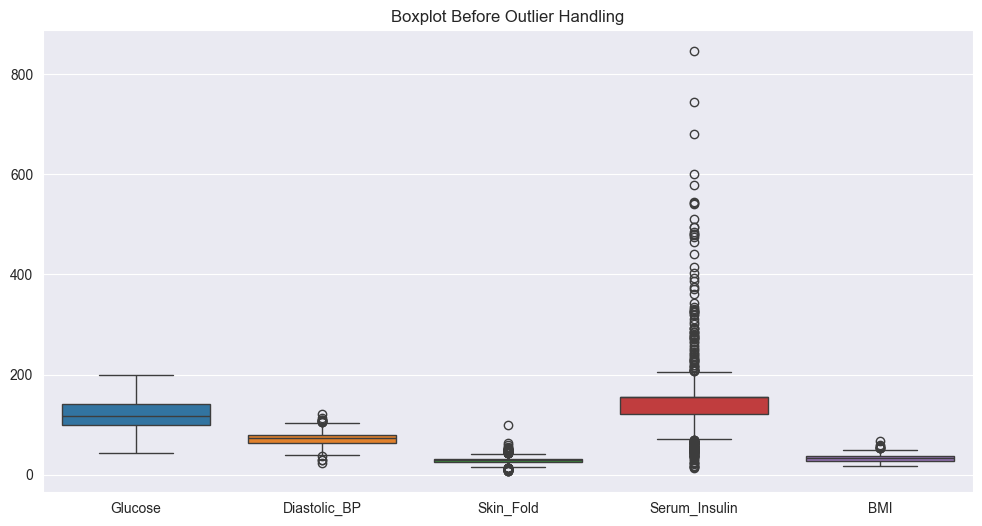

In [24]:
#Boxplot Before Handling Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Glucose", "Diastolic_BP", "Skin_Fold", "Serum_Insulin", "BMI"]])
plt.title("Boxplot Before Outlier Handling")
plt.show()

In [27]:
#Outliers specifically
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["BMI"] < lower_bound) | (df["BMI"] > upper_bound)]
print(outliers)

     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
120         0    162.0     76.000000   56.00000     100.000000  53.2   
125         1     88.0     30.000000   42.00000      99.000000  55.0   
177         0    129.0    110.000000   46.00000     130.000000  67.1   
193        11    135.0     72.405184   29.15342     155.548223  52.3   
247         0    165.0     90.000000   33.00000     680.000000  52.3   
303         5    115.0     98.000000   29.15342     155.548223  52.9   
445         0    180.0     78.000000   63.00000      14.000000  59.4   
673         3    123.0    100.000000   35.00000     240.000000  57.3   

     Diabetes_Pedigree  Age  Class  
120              0.759   25      1  
125              0.496   26      1  
177              0.319   26      1  
193              0.578   40      1  
247              0.427   23      0  
303              0.209   28      1  
445              2.420   25      1  
673              0.880   22      0  


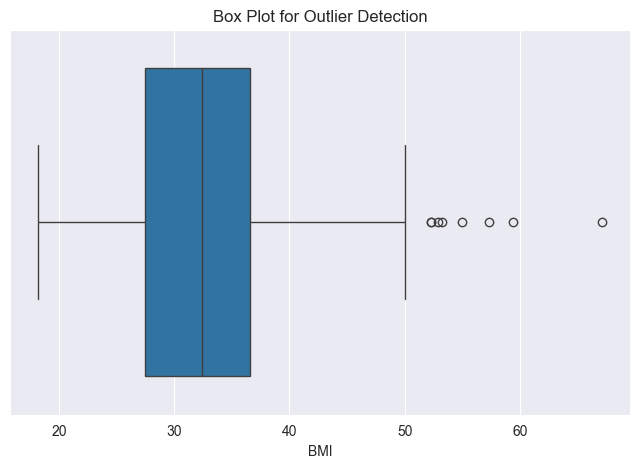

In [31]:
#Boxplot Before Handling Outliers BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["BMI"])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [32]:
#Handling Outliers
#Outliers to low or upper bound
for col in ["Glucose", "Diastolic_BP", "Skin_Fold", "Serum_Insulin", "BMI"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("\nDataset After Handling Outliers:")
print(df.describe())


Dataset After Handling Outliers:
         Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  768.000000    768.000000  768.000000     768.000000   
mean     3.845052  121.686763     72.376538   28.911883     143.937487   
std      3.369578   30.435949     11.696836    7.443497      39.496793   
min      0.000000   44.000000     40.000000   14.500000      70.427665   
25%      1.000000   99.750000     64.000000   25.000000     121.500000   
50%      3.000000  117.000000     72.202592   29.153420     155.548223   
75%      6.000000  140.250000     80.000000   32.000000     155.548223   
max     17.000000  199.000000    104.000000   42.500000     206.620558   

              BMI  Diabetes_Pedigree         Age       Class  
count  768.000000         768.000000  768.000000  768.000000  
mean    32.395615           0.471876   33.240885    0.348958  
std      6.667466           0.331329   11.760232    0.476951  
min     18.200000           0.078000   21.00000

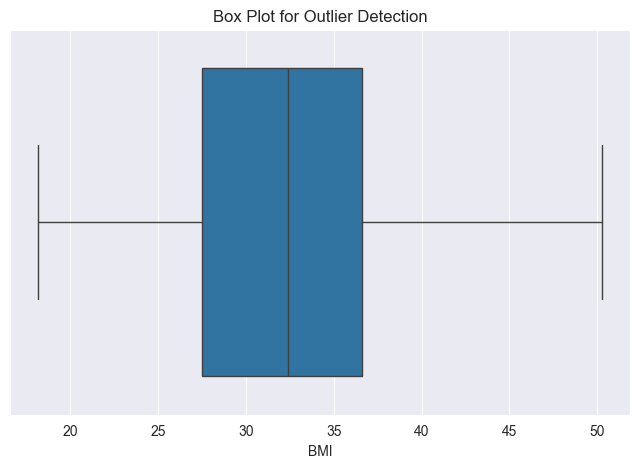

In [34]:
#Boxplot After Handling Outliers BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["BMI"])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [ ]:
df.to_csv("/Users/vascofelgueiras/Desktop/Universidade/AnaliseDados/Diabetes Missing Data.csv", index=False)
print("Cleaned dataset saved as 'Diabetes Missing Data.csv'")